# KNN案例实践

## 1.距离的计算（衡量样本的相似）

In [1]:
import numpy as np
sample1=np.array([2.1,2.5,3.8])
sample2=np.array([1.0,1.7,6.6])

### （1）欧式距离

In [2]:
def  Euclidean_distance(sample1,sample2):
     return  np.sqrt(sum((sample1-sample2)**2))
             #np.linalg.norm(sample1-sample2)

In [3]:
Euclidean_distance(sample1,sample2)

3.1128764832546763

### （2）曼哈顿距离

In [4]:
def Manhattan_Distance(sample1,sample2):
    return np.sum(np.abs(sample1-sample2))
           #np.linalg.norm(vector1-vector2,ord=1)

In [5]:
Manhattan_Distance(sample1,sample2)

4.7

### （3）闵氏距离

In [6]:
def Minkowski_Distance(sample1,sample2,p):
     return np.linalg.norm(sample1-sample2,ord=p)

In [7]:
Minkowski_Distance(sample1,sample2,p=1) #此时即曼哈顿距离

4.7

In [8]:
Minkowski_Distance(sample1,sample2,p=2) #此时即为欧式距离

3.1128764832546763

In [9]:
Minkowski_Distance(sample1,sample2,p=4)

2.821098921158433

## 2.鸢尾花分类案例

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors
import warnings

#jupyter notebook中为了在代码行直接显示图形
%matplotlib inline 

warnings.filterwarnings('ignore')
#plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

### （1）导入数据

In [13]:
from sklearn import datasets
iris=datasets.load_iris()

**查看数据集**

In [14]:
iris.data.shape

(150, 4)

In [15]:
iris.target.shape

(150,)

In [16]:
iris.data[:5,]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [17]:
iris.target[:5,]

array([0, 0, 0, 0, 0])

### （2）描述分析

In [18]:
#不在重复代码，参考以前代码

### （3）划分特征和输出

In [19]:
X=iris.data[:,:2] #为了方便可视化，只取两个维读特征
y=iris.target     #分类标签

### （4）模型构建

**设定KNN模型参数：k=15,投票方式为uniform**

In [20]:
n_neighbors=15
weights="uniform"

**模型训练**

In [21]:
knn_clf1=neighbors.KNeighborsClassifier(n_neighbors=n_neighbors,weights=weights)
knn_clf1.fit(X,y)

KNeighborsClassifier(n_neighbors=15)

**模型预测**

In [22]:
y_pre=knn_clf1.predict(X)

In [23]:
import pandas as pd
pd.DataFrame(y,y_pre)

,0
0,0
0,0
0,0
0,0
0,0
...,...
2,2
2,2
2,2
2,2


### （5）效果展示

**构造网格**

In [24]:
x_min,x_max=X[:,0].min()-1,X[:,0].max()+1  #图的横坐标范围
y_min,y_max=X[:,1].min()-1,X[:,1].max()+1  #图的纵坐标范围

xx,yy=np.meshgrid(np.arange(x_min,x_max,0.02),np.arange(y_min,y_max,0.02)) #网格

In [25]:
z=knn_clf1.predict(np.c_[xx.ravel(),yy.ravel()])

In [26]:
z

array([0, 0, 0, ..., 2, 2, 2])

In [27]:
z=z.reshape(xx.shape)

In [28]:
z

array([[0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       ...,
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2]])

**设定颜色**

In [29]:
camp_light=ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
camp_bold=ListedColormap(['#FF0000','#00FF00','#0000FF'])

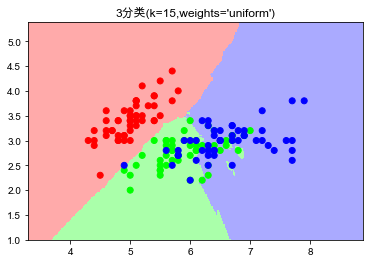

In [30]:
plt.figure()
plt.pcolormesh(xx,yy,z,cmap=camp_light)
plt.scatter(X[:,0],X[:,1],c=y,cmap=camp_bold)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title("3分类(k=%i,weights='%s')"%(n_neighbors,weights))
plt.show()

### （6）模型投票方式不同的模型效果对比

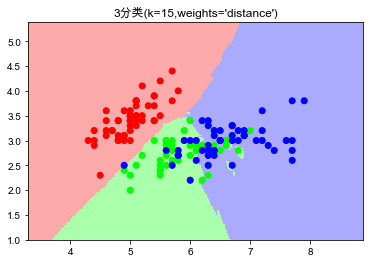

In [31]:
n_neighbors=15
weights="distance" 

knn_clf2=neighbors.KNeighborsClassifier(n_neighbors=n_neighbors,weights=weights)
knn_clf2.fit(X,y)

x_min,x_max=X[:,0].min()-1,X[:,0].max()+1  #图的横坐标范围
y_min,y_max=X[:,1].min()-1,X[:,1].max()+1  #图的纵坐标范围

xx,yy=np.meshgrid(np.arange(x_min,x_max,0.02),np.arange(y_min,y_max,0.02)) #网格
z=knn_clf1.predict(np.c_[xx.ravel(),yy.ravel()])
z=z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx,yy,z,cmap=camp_light)
plt.scatter(X[:,0],X[:,1],c=y,cmap=camp_bold)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title("3分类(k=%i,weights='%s')"%(n_neighbors,weights))
plt.show()

### （7）选择不同的K模型分类效果

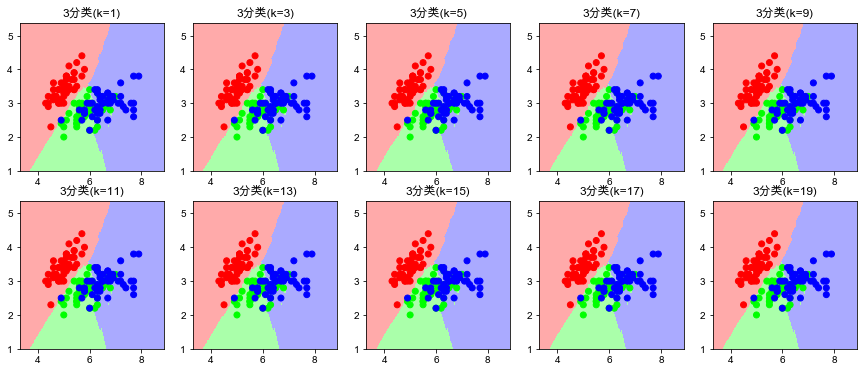

In [32]:
plt.figure(figsize=(15, 6))
for k in np.arange(1,20,2):
    knn_clf2=neighbors.KNeighborsClassifier(n_neighbors=k,weights='distance')
    knn_clf2.fit(X,y)

    x_min,x_max=X[:,0].min()-1,X[:,0].max()+1  #图的横坐标范围
    y_min,y_max=X[:,1].min()-1,X[:,1].max()+1  #图的纵坐标范围

    xx,yy=np.meshgrid(np.arange(x_min,x_max,0.02),np.arange(y_min,y_max,0.02)) #网格
    z=knn_clf1.predict(np.c_[xx.ravel(),yy.ravel()])
    z=z.reshape(xx.shape)

    plt.subplot(2,5,((k+1)/2)) 
    plt.pcolormesh(xx,yy,z,cmap=camp_light)
    plt.scatter(X[:,0],X[:,1],c=y,cmap=camp_bold)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    plt.title("3分类(k=%i)"%(k))
plt.show()

## 3.鸢尾花回归案例（目标预测第一列）

### （1）分成特征和输出

In [33]:
X1=np.c_[iris.data[:,1:],iris.target]
y1=iris.data[:,1]

In [35]:
X1[:10,]

array([[3.5, 1.4, 0.2, 0. ],
       [3. , 1.4, 0.2, 0. ],
       [3.2, 1.3, 0.2, 0. ],
       [3.1, 1.5, 0.2, 0. ],
       [3.6, 1.4, 0.2, 0. ],
       [3.9, 1.7, 0.4, 0. ],
       [3.4, 1.4, 0.3, 0. ],
       [3.4, 1.5, 0.2, 0. ],
       [2.9, 1.4, 0.2, 0. ],
       [3.1, 1.5, 0.1, 0. ]])

In [36]:
y1[:10]

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1])

### （2）模型构建

**训练模型**

In [37]:
knn_reg = neighbors.KNeighborsRegressor(n_neighbors=15,weights='distance')
knn_reg.fit(X1,y1)

KNeighborsRegressor(n_neighbors=15, weights='distance')

In [39]:
result=knn_reg.predict(X1)

### 结果效果

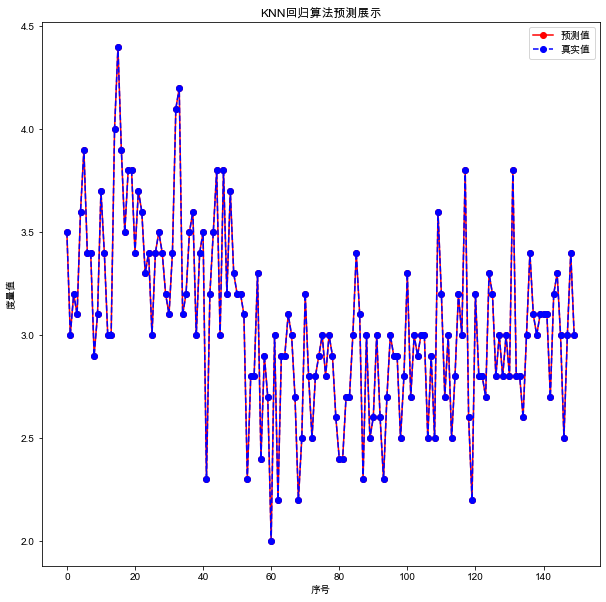

In [41]:
plt.figure(figsize=(10,10))
plt.plot(result,"ro-",label="预测值")
plt.plot(y1,"bo--",label="真实值")
plt.title("KNN回归算法预测展示")
plt.xlabel("序号")
plt.ylabel("度量值")
plt.legend()
plt.show()

## 3.手写图片识别

In [2]:
from os import listdir

In [3]:
#将32x32的二进制图像转换为1x1024向量
def img2vector(filename):
    #创建1x1024零向量
    returnVect = np.zeros((1, 1024))
    #打开文件
    fr = open(filename)
    #按行读取
    for i in range(32):
        #读一行数据
        lineStr = fr.readline()
        #每一行的前32个元素依次添加到returnVect中
        for j in range(32):
            returnVect[0, 32*i+j] = int(lineStr[j])
    #返回转换后的1x1024向量
    return returnVect

In [4]:
#返回trainingDigits目录下的文件名
trainingFileList = listdir('F:/大三（上）/机器学习/KNN参考代码/KNN参考代码/trainingDigits')

In [5]:
len(trainingFileList)

3868

In [9]:
#训练集的Labels
hwLabels = []

#返回trainingDigits目录下的文件名
path='F:/大三（上）/机器学习/KNN参考代码/KNN参考代码/'
trainingFileList = listdir(path+'trainingDigits')
    
#返回文件夹下文件的个数
m = len(trainingFileList)
    
#初始化训练的Mat矩阵,训练集
trainingMat = np.zeros((m, 1024))
    
#从文件名中解析出训练集的类别
for i in range(m):
    #获得文件的名字
    fileNameStr = trainingFileList[i]
    #获得分类的数字
    classNumber = int(fileNameStr.split('_')[0])
    #将获得的类别添加到hwLabels中
    hwLabels.append(classNumber)
    #将每一个文件的1x1024数据存储到trainingMat矩阵中
    trainingMat[i,:] = img2vector(path+'trainingDigits/%s' % (fileNameStr))

ValueError: invalid literal for int() with base 10: '.'

In [38]:
trainingMat[:10,]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
trainingMat.shape

(1934, 1024)

In [40]:
hwLabels[:10]

[5, 4, 8, 8, 5, 4, 5, 3, 3, 3]

In [41]:
#构建kNN分类器
neigh =neighbors.KNeighborsClassifier(n_neighbors = 3, algorithm = 'auto')

#拟合模型, trainingMat为训练矩阵,hwLabels为对应的标签
neigh.fit(trainingMat, hwLabels)
    
#返回testDigits目录下的文件列表
testFileList = listdir(path+'testDigits')
    
#错误检测计数
errorCount = 0.0
    
#测试数据的数量
mTest = len(testFileList)
    
#从文件中解析出测试集的类别并进行 分类测试
for i in range(mTest):
    #获得文件的名字
    fileNameStr = testFileList[i]
    #获得分类的数字
    classNumber = int(fileNameStr.split('_')[0])
    #获得测试集的1x1024向量,用于训练
    vectorUnderTest = img2vector(path+'testDigits/%s' % (fileNameStr))
    #获得预测结果
    classifierResult = neigh.predict(vectorUnderTest)
    print("分类返回结果为%d\t真实结果为%d" % (classifierResult, classNumber))
    if(classifierResult != classNumber):
            errorCount += 1.0
print("总共错了%d个数据\n错误率为%f%%" % (errorCount, errorCount/mTest * 100))

分类返回结果为4	真实结果为4
分类返回结果为4	真实结果为4
分类返回结果为3	真实结果为3
分类返回结果为9	真实结果为9
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为9	真实结果为9
分类返回结果为7	真实结果为7
分类返回结果为7	真实结果为7
分类返回结果为0	真实结果为0
分类返回结果为3	真实结果为3
分类返回结果为2	真实结果为2
分类返回结果为2	真实结果为2
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为2	真实结果为2
分类返回结果为6	真实结果为6
分类返回结果为6	真实结果为6
分类返回结果为9	真实结果为9
分类返回结果为8	真实结果为8
分类返回结果为1	真实结果为8
分类返回结果为1	真实结果为1
分类返回结果为8	真实结果为8
分类返回结果为1	真实结果为1
分类返回结果为3	真实结果为8
分类返回结果为9	真实结果为9
分类返回结果为6	真实结果为6
分类返回结果为6	真实结果为6
分类返回结果为5	真实结果为5
分类返回结果为2	真实结果为2
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为2	真实结果为2
分类返回结果为2	真实结果为2
分类返回结果为9	真实结果为9
分类返回结果为3	真实结果为3
分类返回结果为0	真实结果为0
分类返回结果为7	真实结果为7
分类返回结果为7	真实结果为7
分类返回结果为0	真实结果为0
分类返回结果为9	真实结果为9
分类返回结果为9	真实结果为9
分类返回结果为0	真实结果为0
分类返回结果为3	真实结果为3
分类返回结果为4	真实结果为4
分类返回结果为4	真实结果为4
分类返回结果为4	真实结果为4
分类返回结果为3	真实结果为3
分类返回结果为4	真实结果为4
分类返回结果为3	真实结果为3
分类返回结果为1	真实结果为1
分类返回结果为9	真实结果为9
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为7	真实结果为7
分类返回结果为9	真实结果为9
分类返回结果为7	真实结果为7
分类返回结果为0	真实结果为0
分类返回结果为7	真实结果为7
分类返回结果为9	真实结果为9
分类返回结果为0	真实结果为0
分类返回结果为2